                                        © Group 9 Artificial Intelligence 2021         
![](logo.png)
![](epl_teams.png)   

<center><div class="alert" style="background-color:#fff; color:white; text-align:center padding:0px 10px; border-radius:5px;"><h2 style='margin:15px 15px; color:#EF7483; font-size:30px'> Predictive Analysis of Players’ Performance in Fantasy Premier League (FPL) fixtures</h2>
</div>
    </center>


### Content:
1. Load the Data
  - Import libraries
  - Load the datasets
  
2. Overview of the Data
  - Descriptive Statistics
  - Missing Values
  
3. Exploratory Data Analysis
  - Create list of columns by data type
  - Check the distribution of target class
  - Check the distribution of every feature
  - Check how differnt numerical features are realated to target class
  
4. Data Preparation
  - Data Cleaning
  - Split X & y
  - Feature Scaling
  - Train Test split
  
5. Model Building
  - Train Model
  - Model Prediction
  - Model Evaluation
  
7. Improve Model
  - Handle Class Imbalance
  - Hyperparameter Tuning
  - Save the Final Model

## Inputs

The notebook is designed in such a way that you just need to plug in the input values given below and run the code. It will run on it's own and will build the model as well. 

In [99]:
# Input file name with path
input_train_file_name = 'X_train.csv'

input_test_file_name = 'Dataset_new.csv'

# Columns to be removed
input_drop_col = ['player_id','player_name','opp','player_position','player_cost']

# Col datatype selection
input_datatype_selection = 'auto'

# Categorical columns to be used
input_cat_columns = []

# Numerical columns
input_num_columns = ['player_state', 'summed_minutes_played', 'form', 'fdr', 'pts_irf', 'gwk_31_pts','player_cost']
'''
player_state: This is the injury state of the player. It is a 0 - 100 likelyhood of a player featuring in a game
summed_minutes_played: This is the sum of minutes played by each player in the last 5 games
form: This is the current form of the player
fdr: This is the match fixture difficulty rating
pts_irf: This is the points obtained by the player in the reverse fixture
gwk_31_pts: This is the point accummulated by each player in the current game week 

'''

# Handle missing value
input_treat_missing_value = 'drop' 


<div class="alert alert-info" style="background-color:#EF7483; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Load the Data</h2>
</div>

In this section you will:

- Import the libraries
- Load the dataset

### 1.1. Import Libraries

Import all the libraries in the first cell itself

In [182]:
# Import libraries 
import pprint

# Data Manipulation
import numpy as np 
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from   sklearn.impute import SimpleImputer
from   sklearn.preprocessing import LabelBinarizer
from   sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from   sklearn.metrics import auc,accuracy_score,roc_curve,plot_roc_curve,roc_auc_score,confusion_matrix , classification_report
from   sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from   sklearn.svm import SVC
from   imblearn.over_sampling import RandomOverSampler
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC


# Maths
import math

# Set the options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline

### 1.2. Load the datasets

Load the dataset using pd.read_csv()

In [101]:
# Read data in form of a csv file
df = pd.read_csv(input_train_file_name)

# First 5 rows of the dataset
df.head()

,player_id,player_name,player_state,summed_minutes_played,form,fdr,pts_irf,player_position,player_cost,opp,gwk_31_pts
0,1,Fernandes,100,450,4.8,4,6,MID,11.5,TOT,2
1,2,Kane,100,439,9.4,4,16,FWD,11.8,MUN,2
2,3,Salah,100,421,3.6,3,13,MID,12.6,AVL,7
3,4,Son,100,243,3.6,4,18,MID,9.5,MUN,7
4,5,Bamford,100,354,3.6,5,1,FWD,6.5,MCI,4


<div class="alert alert-info" style="background-color:#EF7483; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Overview of the Data</h2>
</div>

Before attempting to solve the problem, it's very important to have a good understanding of data.

In this section you will:
- Get the descriptive statistics of the data
- Get the information about missing values in the data

### 2.1. Descriptive Statistics

As the name says descriptive statistics describes the data. It gives you information about
- Mean, median, mode 
- Min, max
- Count etc

Let's understand the data we have

In [102]:
# Dimension of the data
df.shape

(571, 11)

In [103]:
# Summary of the dataset
df.describe()

,player_id,player_state,summed_minutes_played,form,fdr,pts_irf,player_cost,gwk_31_pts
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,306.851138,71.322242,161.922942,1.366725,3.110333,1.458844,5.993345,1.339755
std,190.852595,43.169936,175.992746,1.693687,0.949653,3.009862,3.950877,2.542994
min,1.000000,0.000000,0.000000,-0.800000,2.000000,-2.000000,3.800000,-2.000000
25%,143.500000,25.000000,0.000000,0.000000,2.000000,0.000000,4.500000,0.000000
50%,289.000000,100.000000,90.000000,0.600000,3.000000,0.000000,5.000000,0.000000
75%,459.500000,100.000000,335.500000,2.400000,4.000000,2.000000,5.700000,2.000000
max,685.000000,100.000000,450.000000,9.400000,5.000000,24.000000,34.000000,17.000000


### 2.2 Missing Values

Get the info about missing values in the dataframe

In [104]:
# Missing values for every column
df.isna().sum()

player_id                0
player_name              0
player_state             0
summed_minutes_played    0
form                     0
fdr                      0
pts_irf                  0
player_position          0
player_cost              0
opp                      0
gwk_31_pts               0
dtype: int64

<div class="alert alert-info" style="background-color:#EF7483; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Exploratory Data Analaysis</h2>
</div>

Exploratory data analysis is an approach to analyze or investigate data sets to find out patterns and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarise the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

In this section you will:
- Create list of columns by data type
- Check the distribution of target class
- Check the distribution of every feature
- Check how differnt numerical features are realated to target class

### 3.1. Extract data types of columns

It's better to get the list of columns by data types in the start itself. You won't have to manually write the name of columns while performing certain operations. So always get the list of columns in the start itself.

In [105]:
# Remove extra columns
col_remove = input_drop_col
df = df.drop(col_remove, axis = 1)

In [106]:
# Get the list of numeric and categorical columns according to the input
if input_datatype_selection == "auto":

    binary_columns = [col for col in df.columns if df[col].nunique() == 2]
    print("Binary Columns : ", binary_columns)

    categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
    print("Categorical Columns : ", categorical_columns)

    categorical_columns = binary_columns + categorical_columns
    categorical_columns = list(set(categorical_columns))

    numerical_columns = [col for col in df.columns if col not in categorical_columns]
    print("Numerical Columns : ", numerical_columns)
    
else:
    categorical_columns = input_cat_columns
    print("Categorical Columns : ", categorical_columns)
    
    numerical_columns   = input_num_columns
    print("Numerical Columns : ", numerical_columns)

Binary Columns :  []
Categorical Columns :  []
Numerical Columns :  ['player_state', 'summed_minutes_played', 'form', 'fdr', 'pts_irf', 'gwk_31_pts']


**Note :** There might be some mismatch in the data type of the columns, so in such cases you will have to correct it manually

### 3.2 Check distribution of target class

We now group the target class and check the distribution of target class, see how many categories are there, is it balanced or not

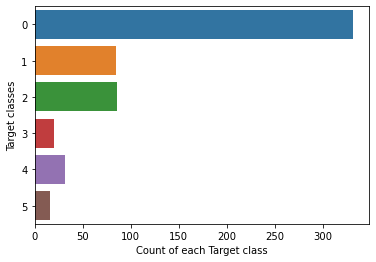

In [107]:
#group the target class from 1-6
df['gwk_31_pts'] = np.where(df['gwk_31_pts'].between(1,1),1,df['gwk_31_pts'])
df['gwk_31_pts'] = np.where(df['gwk_31_pts'].between(2,3),2,df['gwk_31_pts'])
df['gwk_31_pts'] = np.where(df['gwk_31_pts'].between(4,5),3,df['gwk_31_pts'])
df['gwk_31_pts'] = np.where(df['gwk_31_pts'].between(6,8),4,df['gwk_31_pts'])
df['gwk_31_pts'] = df['gwk_31_pts'].mask(df['gwk_31_pts'] > 8,5)
df['gwk_31_pts'] = df['gwk_31_pts'].mask(df['gwk_31_pts'] < 0,0)


# Check distribution of target class
sns.countplot(y=df['gwk_31_pts'] ,data=df)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### 3.3. Check the distribution of every feature

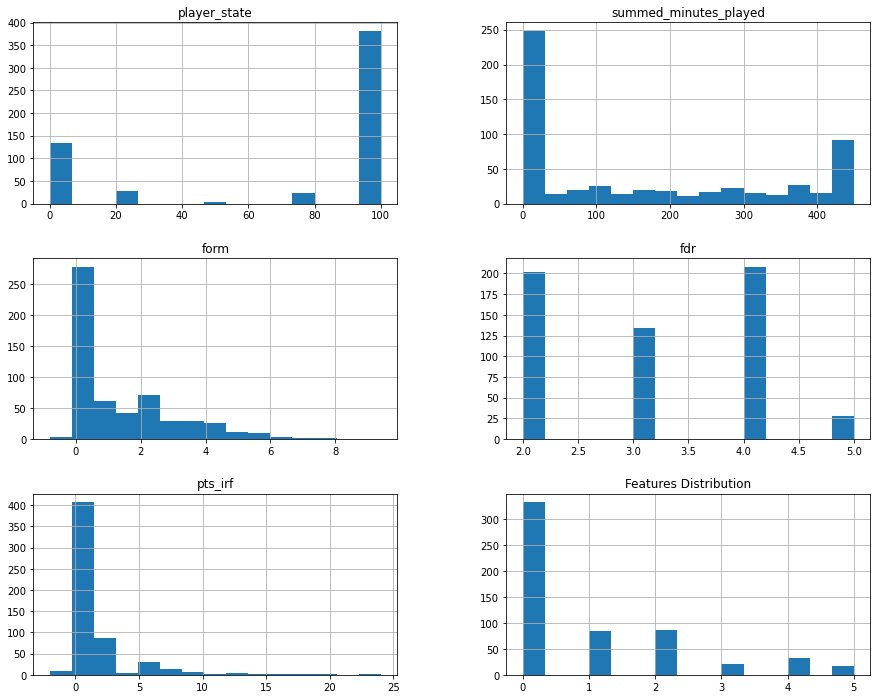

In [108]:
# Check the distribution of all the features
df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

### 3.4 Check how differnt numerical features are realated to target class

In [109]:
# Number of rows and columns in the plot
n_cols = 3
n_rows = math.ceil(len(numerical_columns)/n_cols)

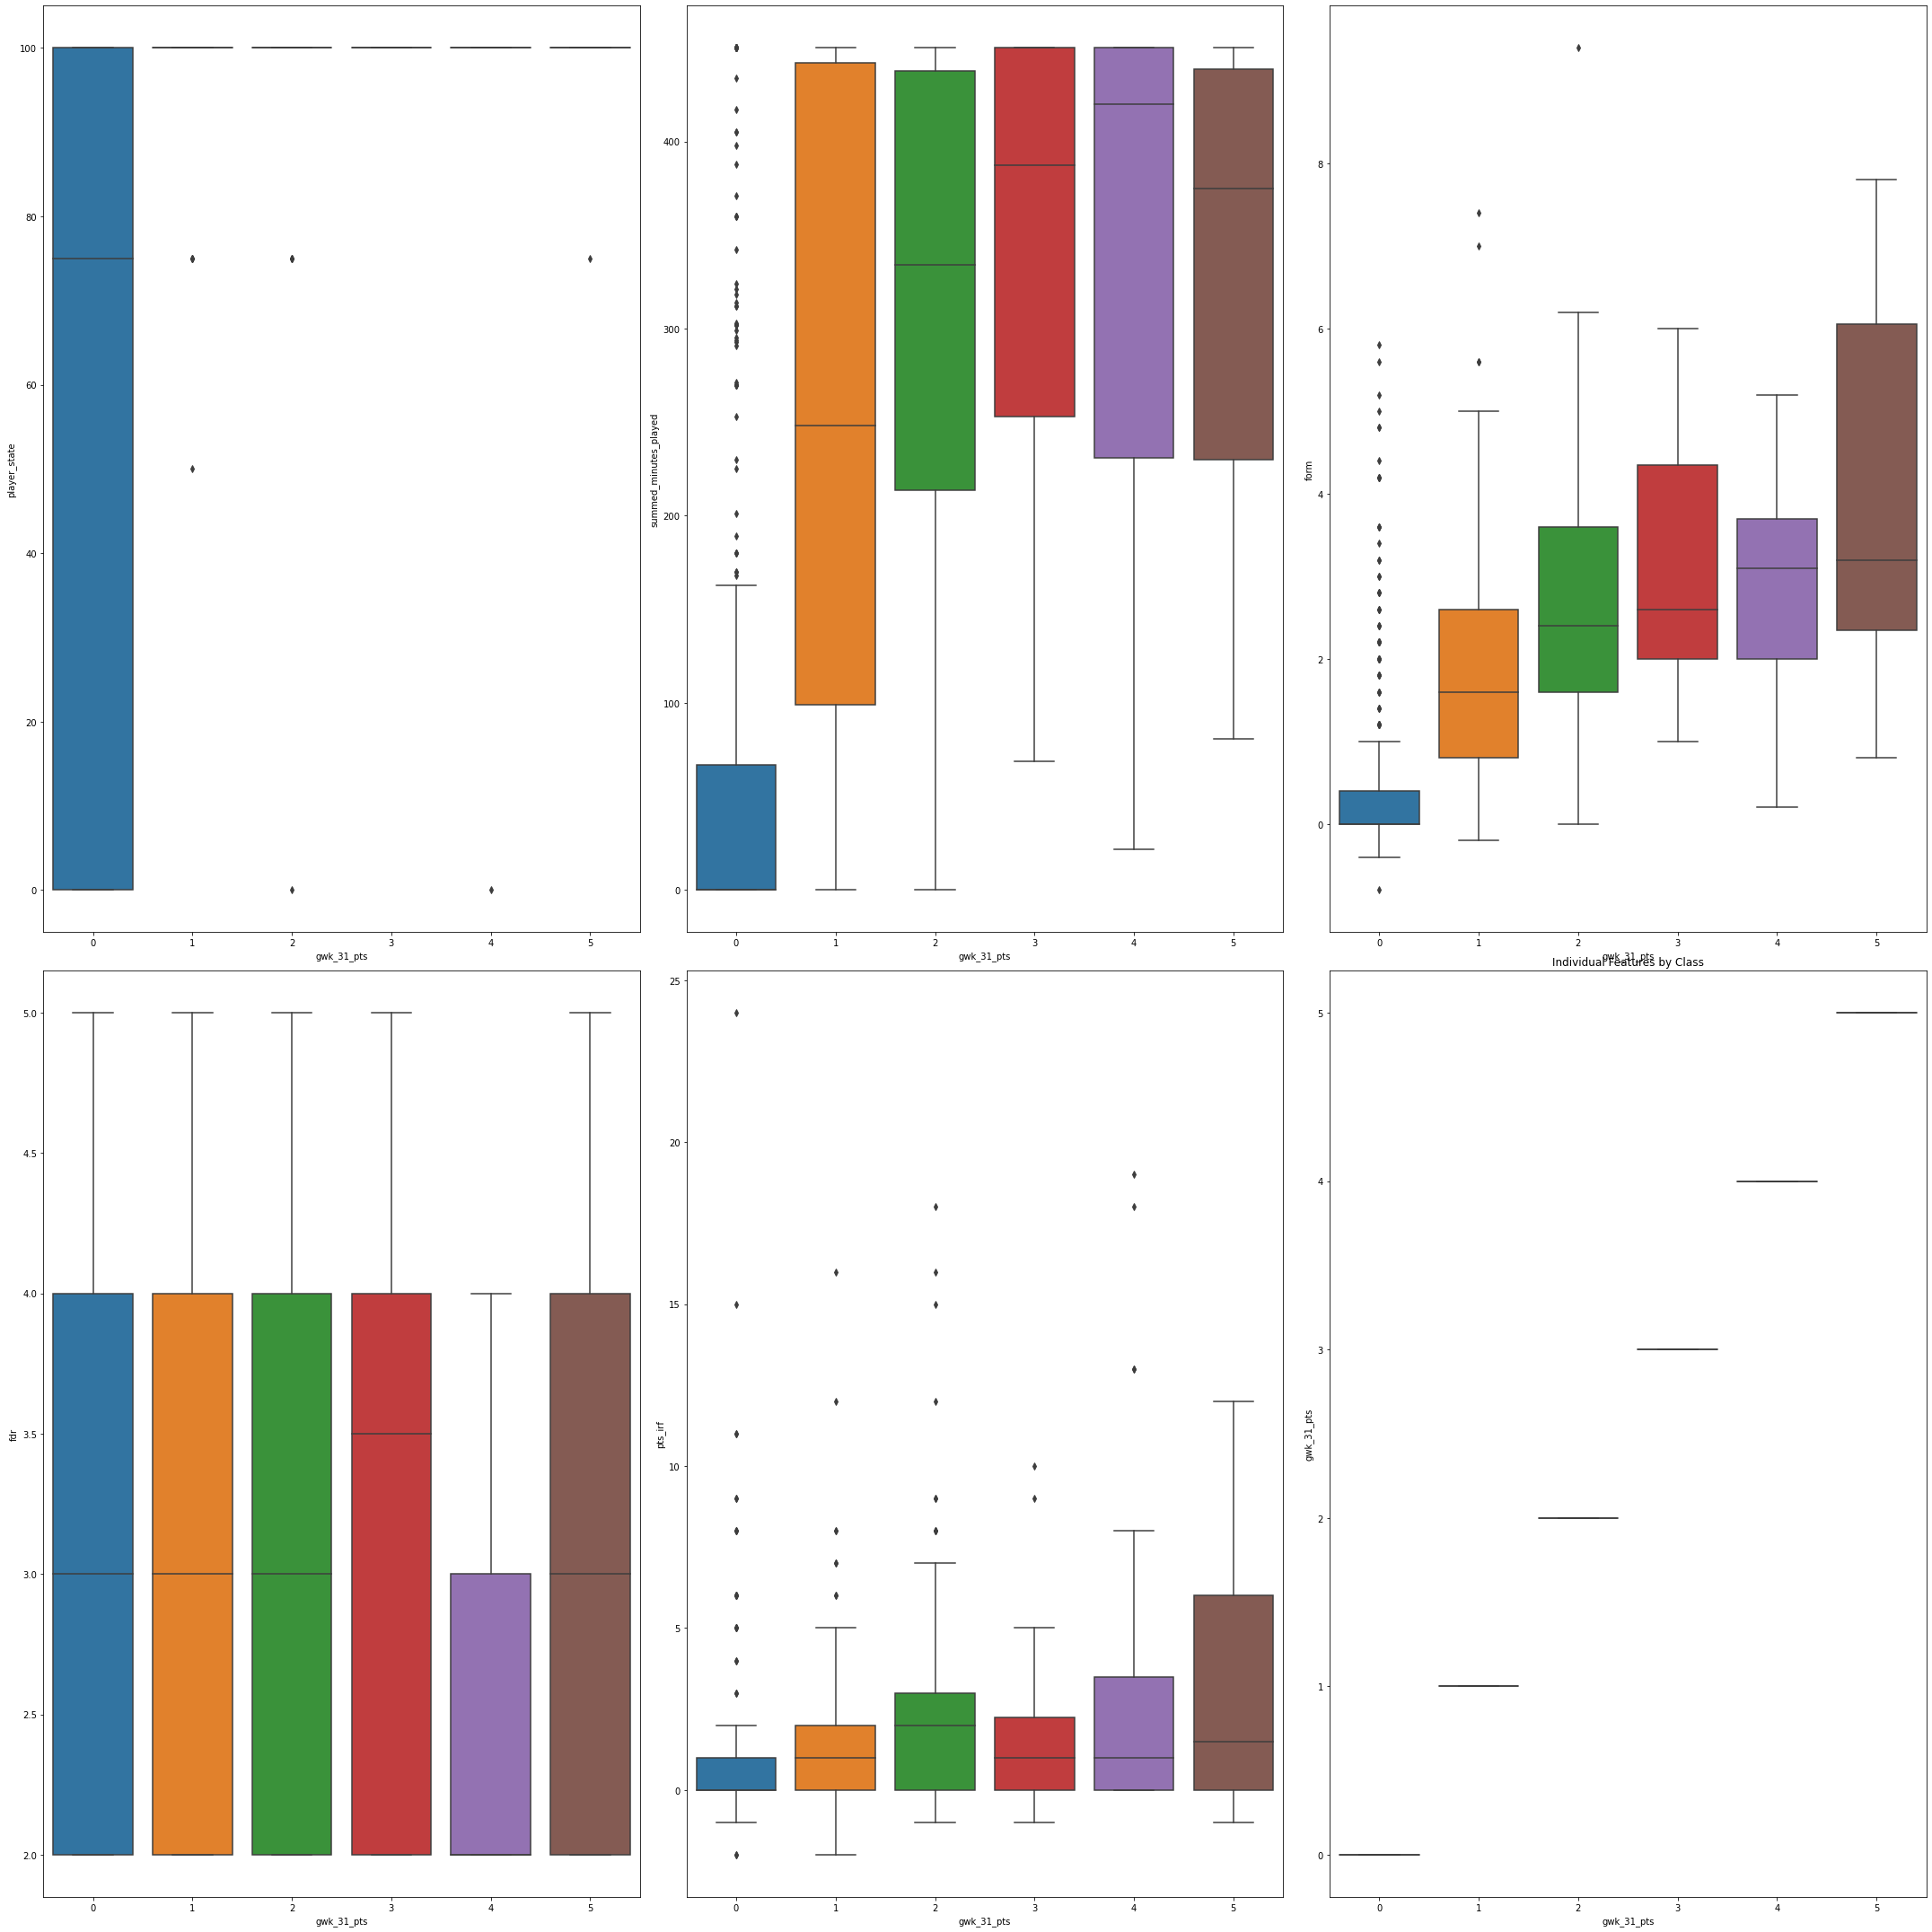

In [110]:
# Check the distribution of y variable corresponding to every x variable 
fig,ax = plt.subplots(nrows = n_rows, ncols = n_cols, figsize=(30,30))
row = 0
col = 0
for i in numerical_columns:
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = df['gwk_31_pts'], y = df[i],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

<div class="alert alert-info" style="background-color:#EF7483; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preparation</h2>
</div>

The data is not yet ready for model building. You need to process the data and make it ready for model building

In this section you will:
- Clean the data
- Encode the categorical features
- Split the dataset in X and y dataset
- Scale the features
- Split the data in train and test set

### 4.1. Data Cleaning

Machine Learning works on the idea of garbage in - garbage out. If you feed in dirty data, the results won't be good. Hence it's very important to clean the data before training the model.

**Sklearn algorithms need missing value imputation but XGBoost, LightGBM etc does not require missing value imputation**

There are various ways to handle missing values. Some of the ways are:
- Drop the rows with missing values
- Impute the missing values with mean, median, mode, most frequent category, unknown category etc

Here you can decide how you want to handle the missing data

In [111]:
# Select how you wish to treat missing values according to the input provided
if input_treat_missing_value == 'drop':
    
    # drop rows with missing values
    df.dropna(inplace=True)
    print(df.shape)

elif input_treat_missing_value == 'impute': 
    
    # Impute missing values
    for col in numerical_columns:
        df[col] = df[col].fillna(df[col].mean())
    for col in categorical_columns:
        df[col] = df[col].fillna("Unknown")
elif input_treat_missing_value == 'ignore':
    print("Ignore missing values")

(571, 6)


In [112]:
df.head()

,player_state,summed_minutes_played,form,fdr,pts_irf,gwk_31_pts
0,100,450,4.8,4,6,2
1,100,439,9.4,4,16,2
2,100,421,3.6,3,13,4
3,100,243,3.6,4,18,4
4,100,354,3.6,5,1,3


In [113]:
df['player_state'] = df[['player_state']].replace([100,75,50,25,0],[5,4,3,1,0])
df['fdr'] = df[['fdr']].replace([5,4,3,2,1],[1,2,3,4,5])
df['summed_minutes_played'] = np.where(df['summed_minutes_played'].between(1,90),1,df['summed_minutes_played'])
df['summed_minutes_played'] = np.where(df['summed_minutes_played'].between(91,180),2,df['summed_minutes_played'])
df['summed_minutes_played'] = np.where(df['summed_minutes_played'].between(181,270),3,df['summed_minutes_played'])
df['summed_minutes_played'] = np.where(df['summed_minutes_played'].between(271,360),4,df['summed_minutes_played'])
df['summed_minutes_played'] = np.where(df['summed_minutes_played'].between(361,450),5,df['summed_minutes_played'])
df['form'] = np.where(df['form'].between(0.1,1.9),1,df['form'])
df['form'] = np.where(df['form'].between(2.0,3.9),2,df['form'])
df['form'] = np.where(df['form'].between(4.0,5.9),3,df['form'])
df['form'] = np.where(df['form'].between(6.0,7.9),4,df['form'])
df['form'] = df['form'].mask(df['form'] > 7.9,5)
df['form'] = df['form'].mask(df['form'] < 0,0)
df['pts_irf'] = np.where(df['pts_irf'].between(0.1,1.9),1,df['pts_irf'])
df['pts_irf'] = np.where(df['pts_irf'].between(2.0,3.9),2,df['pts_irf'])
df['pts_irf'] = np.where(df['pts_irf'].between(4.0,5.9),3,df['pts_irf'])
df['pts_irf'] = np.where(df['pts_irf'].between(6.0,7.9),4,df['pts_irf'])
df['pts_irf'] = df['pts_irf'].mask(df['pts_irf'] > 7.9,5)
df['pts_irf'] = df['pts_irf'].mask(df['pts_irf'] < 0,0)

### 4.2. Split X and y

Split the X and y dataset

In [114]:
# Split the y variable series and x variables dataset
y = df['gwk_31_pts']
X = df.drop(['gwk_31_pts'],axis=1)

### 4.4. Feature Scaling

It is a technique to standardize the x variables (features) present in the data in a fixed range. It needs to be done before training the model.

But if you are using tree based models, you should not go for feature scaling

In [115]:
# Define the function to scale the data using StandardScaler()
def scale_data(data):
    
    scaler = StandardScaler() 

    # transform data
    scaled_data = scaler.fit_transform(data)
    scaled_data = DataFrame(scaled_data)

    scaled_data.columns = data.columns
    
    return scaled_data

In [117]:
# Scale X dataset
scaled_X = scale_data(X)
scaled_X.head()

,player_state,summed_minutes_played,form,fdr,pts_irf
0,0.660004,1.487962,1.842056,-0.937656,2.126703
1,0.660004,1.487962,3.727027,-0.937656,2.829043
2,0.660004,1.487962,0.899570,0.116284,2.829043
3,0.660004,0.494247,0.899570,-0.937656,2.829043
4,0.660004,0.991104,0.899570,-1.991595,0.019680


### 4.5 Train - Test Split

Split the dataset in training and test set

In [118]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

<div class="alert alert-info" style="background-color:#EF7483; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Model Building</h2>
</div>

In this section you will:
- Train the model on training data
- Get the predictions on testing data
- Evaluate the performance of model on testing data

### 5.1 Train Model

Train the model on training data

# Random Forest Classifier

In [184]:
model =  RandomForestClassifier(n_estimators=280)


In [185]:
# Training the model:
model.fit(X_train, y_train)

model

RandomForestClassifier(n_estimators=280)

In [186]:
model.score(X_test,y_test)

0.7508361204013378

# SVM Classifier

In [175]:
model= svm.SVC(probability=True)
model.fit(X_ros, y_ros)


SVC(probability=True)

In [176]:
model.score(X_test,y_test)

0.5551839464882943

# Multi Layered Perceptron Classifier

In [183]:
model = MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.5535117056856187

### 5.2 Model Predictions

Get the predictions from the model on testing data

In [158]:
# Predict class for test dataset
y_pred = model.predict(X_test)

# Predict probability for test dataset
y_pred_prod = model.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [5 3 4 4 4 1 2 2 3 2 5 1 1 3 4 3 3 1 1 5 5 3 1 1 0 1 1 5 3 0 3 3 1 5 0 2 3
 1 3 3 3 1 3 2 2 2 0 2 5 5 1 1 2 5 2 3 4 2 1 5 2 2 0 1 5 4 3 3 3 3 2 1 3 5
 3 4 4 5 0 5 0 0 3 1 1 1 4 2 4 1 1 4 1 0 3 1 1 4 4 3 4 3 0 1 5 3 5 1 1 2 0
 1 2 4 4 5 1 5 5 3 1 5 5 1 5 1 2 5 0 1 1 5 3 2 4 3 1 2 1 4 1 3 5 4 3 1 1 4
 2 0 1 1 3 2 3 3 0 2 3 0 3 4 5 0 5 5 5 0 5 1 4 5 0 0 0 5 5 1 3 5 0 1 4 3 2
 3 3 2 5 3 3 2 0 2 0 0 5 5 0 2 3 3 0 4 1 1 5 0 3 1 5 4 0 0 5 0 2 0 5 3 2 4
 1 3 5 5 1 5 5 1 3 5 1 5 2 1 5 5 5 1 4 5 3 2 1 2 3 5 3 4 3 4 2 2 5 4 2 3 0
 2 2 0 5 4 2 3 0 5 5 1 3 4 3 5 5 2 1 0 4 0 1 1 3 3 1 4 5 2 2 3 1 1 4 4 0 3
 3 3 4 5 4 0 4 0 2 0 0 5 3 1 4 3 2 3 3 5 0 5 1 0 3 5 1 3 2 1 5 1 5 3 3 0 1
 3 1 1 2 0 4 0 3 2 0 3 4 5 1 1 5 3 3 4 0 3 5 2 5 4 4 1 5 2 2 4 4 5 5 1 4 1
 3 3 1 0 3 0 4 4 1 5 1 1 3 5 1 0 5 1 4 3 2 3 1 1 5 1 3 3 5 4 1 2 0 3 3 4 3
 0 3 3 0 2 1 3 3 3 0 5 1 4 3 1 0 1 3 3 4 4 1 1 1 2 2 3 5 4 2 3 3 3 5 3 5 2
 0 0 0 3 0 4 2 5 3 1 1 5 1 3 5 0 0 5 3 3 4 2 0 3 2 5 3 3 0 1 5 1 2 4 1 1 3
 1 2 5 2 4

### 5.3. Model Evaluation

Get the evaluation metrics to evaluate the performance of model on testing data

In [187]:
# Define a function to compute various evaluation metrics 
def compute_evaluation_metric(testX, testy, y_predicted, y_predicted_prob,trainy,trainX):
    print("\n Accuracy Score :  ",accuracy_score(testy,y_predicted))
    print("\n Confusion Matrix : ")
    show_confusion_matrix(testy, y_predicted)
    print("\n Classification Report : \n",classification_report(testy, y_predicted))
    print("\n AUC Score :", multiclass_roc_auc_score(testy, y_predicted))
    print("\n ROC curve : \n")
    plot_multiclass_roc(model, testX, testy, n_classes=6, figsize=(13, 9))
    
def show_confusion_matrix(validations, predictions):
    LABELS = ['0','1','2','3','4','5']
    matrix = confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


def multiclass_roc_auc_score(testy, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(testy)
    y_test = lb.transform(testy)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred,multi_class='ovo', average=average)

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)
    LABELS = ['0','1','2','3','4','5']
    # structures
    fpr = {}
    tpr = {}
    roc_auc = {}

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic (ROC)')
    for i in  range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %s' % (roc_auc[i], LABELS[i]))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()
   


 Accuracy Score :   0.5551839464882943

 Confusion Matrix : 


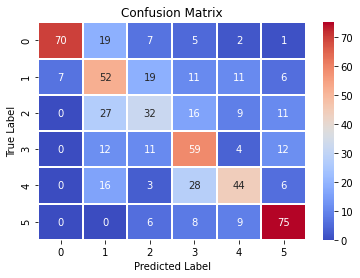


 Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       104
           1       0.41      0.49      0.45       106
           2       0.41      0.34      0.37        95
           3       0.46      0.60      0.52        98
           4       0.56      0.45      0.50        97
           5       0.68      0.77      0.72        98

    accuracy                           0.56       598
   macro avg       0.57      0.55      0.56       598
weighted avg       0.57      0.56      0.56       598


 AUC Score : 0.732296011336301

 ROC curve : 



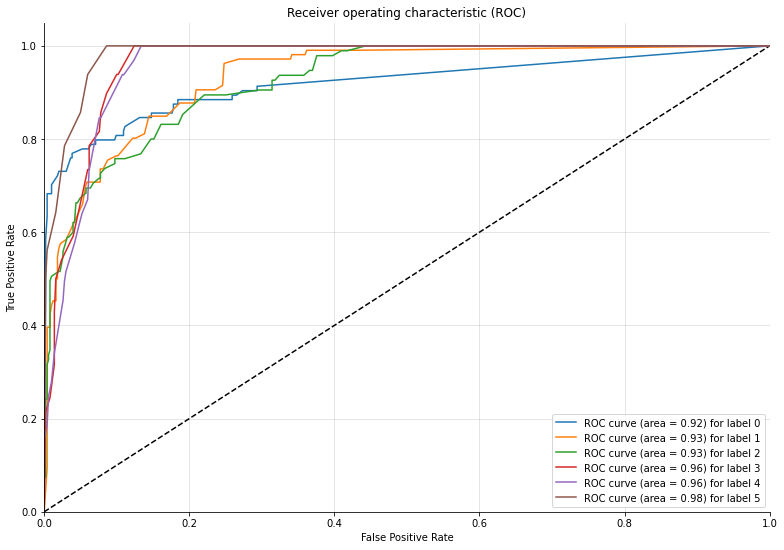

In [188]:
compute_evaluation_metric( X_test, y_test, y_pred, y_pred_prod,y_train,X_train)

<div class="alert alert-info" style="background-color:#EF7483; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Improve Model</h2>
</div>

The first model you make may not be a good one. You need to improve the model. 

In majority of the classification problems, the target class is imbalanced. So you need to balance it in order to get best modelling results. 

In this section you will:
- Handle class imbalance
- Save the final model

### 6.1 Handle Class Imbalance

Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class.

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.

Here, you will upsample the minority class

In [190]:
# Over sample the minority class 
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

y_ros.value_counts()


5    332
4    332
3    332
2    332
1    332
0    332
Name: gwk_31_pts, dtype: int64

In [191]:
# Define the function to build model on balanced dataset
def classification_model(X, y):
    
    scaled_X = scale_data(X)
    
    # Split the dataset into the training set and test set
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 0)

    # Training the model:
    model.fit(X_train, y_train)

    # Predict class for test dataset
    y_pred = model.predict(X_test)
    
    # Predict probability for test dataset
    y_pred_prod = model.predict_proba(X_test)
    y_pred_prod = [x[1] for x in y_pred_prod]
    
    # Compute Evaluation Metric
    compute_evaluation_metric( X_test, y_test, y_pred, y_pred_prod,y_train,X_train)
    
    return model


 Accuracy Score :   0.745819397993311

 Confusion Matrix : 


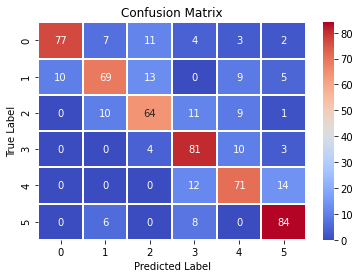


 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       104
           1       0.75      0.65      0.70       106
           2       0.70      0.67      0.68        95
           3       0.70      0.83      0.76        98
           4       0.70      0.73      0.71        97
           5       0.77      0.86      0.81        98

    accuracy                           0.75       598
   macro avg       0.75      0.75      0.74       598
weighted avg       0.75      0.75      0.75       598


 AUC Score : 0.8480092767059279

 ROC curve : 



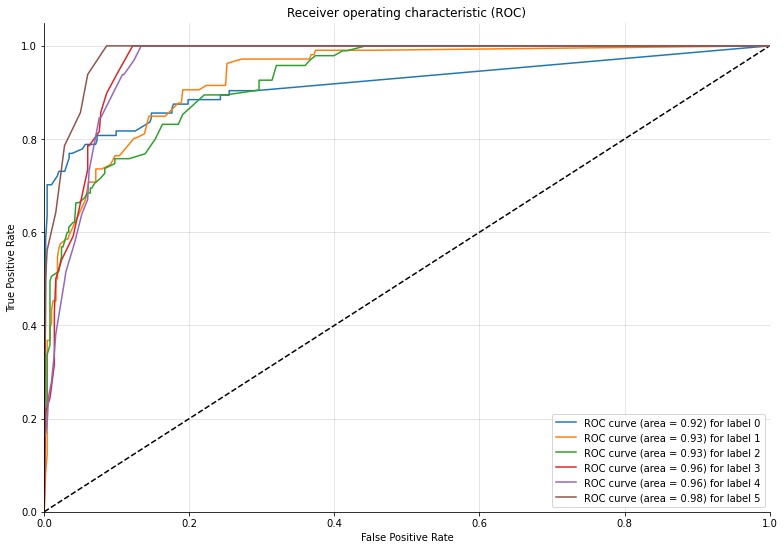

In [134]:
# Build model on balanced data and get evaluation metrics
model = classification_model(X_ros, y_ros)

### 6.2. Hyperparameter Tuning

**Hyperparameter** is a parameter whose value is set before the learning process begins

**Hyperparameter tuning** refers to the automatic optimization of the hyper-parameters of a ML model

- Select the parameter grid according to the input provided

In [135]:
# Split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 0)

In [136]:
# Define the parameters gird for random forest
param_grid_random_forest = {'max_depth'   : [10,20,40],
                            'n_estimators' : [100,200,300],
                            'min_samples_leaf' : [1,2,5]        
                           }  
param_grid  = param_grid_random_forest

In [137]:
 # Run grid search 
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3, n_jobs = -1) 
  
# fit the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   28.2s finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=280), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 40],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [138]:
# Prediction using best parameters
y_pred = grid.predict(X_test)

# Predict probability for test dataset
y_pred_prod = grid.predict_proba(X_test)
y_pred_prod = [x[1] for x in y_pred_prod]
print("Y predicted : ",y_pred)
print("Y probability predicted : ",y_pred_prod[:5])

Y predicted :  [5 3 2 5 4 1 5 5 4 2 5 1 4 3 4 3 4 4 1 3 5 3 1 3 0 1 3 2 3 0 3 4 3 5 0 3 4
 3 4 2 3 3 3 1 1 2 1 3 5 3 1 4 3 5 5 3 5 2 4 5 1 5 0 1 5 1 4 3 3 1 2 3 1 5
 2 5 4 5 0 5 0 0 3 1 1 2 4 5 1 1 2 5 1 0 3 0 4 4 4 3 2 4 0 1 5 2 5 1 1 3 0
 2 5 4 2 5 4 5 3 3 3 5 5 0 2 2 5 5 0 1 2 4 3 3 1 3 1 5 2 4 0 3 5 5 3 4 2 4
 5 0 4 4 1 2 3 1 0 3 3 0 3 5 5 0 5 5 5 0 5 1 4 5 0 0 0 5 5 3 3 5 0 0 4 3 3
 3 3 2 5 3 3 2 0 3 0 0 5 5 0 2 3 3 0 1 2 2 5 0 3 1 5 4 0 0 5 0 2 0 5 3 5 4
 4 3 5 5 3 5 5 3 3 3 3 5 3 2 5 2 5 4 4 5 2 2 1 1 3 5 1 5 3 4 5 2 3 4 5 3 0
 2 2 0 5 4 5 4 0 5 5 1 4 5 3 2 3 2 4 0 4 0 2 2 3 3 2 4 5 1 5 4 4 1 5 4 0 4
 2 3 4 5 4 0 4 0 3 0 0 5 4 3 5 2 3 2 3 5 0 5 1 0 3 5 1 3 2 4 5 1 5 1 4 0 0
 3 1 2 2 0 5 0 4 2 0 4 5 5 4 2 5 3 2 2 0 3 5 2 5 1 2 2 3 2 5 4 1 5 4 1 1 0
 4 4 4 0 4 0 5 4 3 1 3 1 3 5 1 1 4 1 1 3 2 1 1 4 5 4 2 4 5 5 2 2 0 3 3 5 3
 0 3 4 0 5 3 3 3 3 0 5 1 4 2 2 0 3 3 3 5 1 1 3 4 3 2 4 2 4 2 3 4 3 5 3 5 1
 0 0 0 3 0 4 2 5 3 1 1 5 2 4 5 0 0 5 1 2 5 1 0 3 2 4 3 4 0 1 5 4 5 5 1 1 4
 2 1 5 2 4


 Accuracy Score :   0.745819397993311

 Confusion Matrix : 


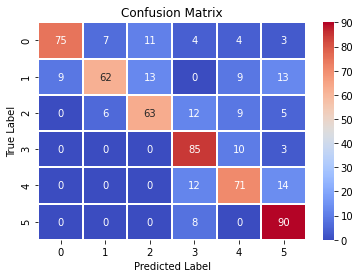


 Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.72      0.80       104
           1       0.83      0.58      0.69       106
           2       0.72      0.66      0.69        95
           3       0.70      0.87      0.78        98
           4       0.69      0.73      0.71        97
           5       0.70      0.92      0.80        98

    accuracy                           0.75       598
   macro avg       0.76      0.75      0.74       598
weighted avg       0.76      0.75      0.74       598


 AUC Score : 0.8485552574147207

 ROC curve : 



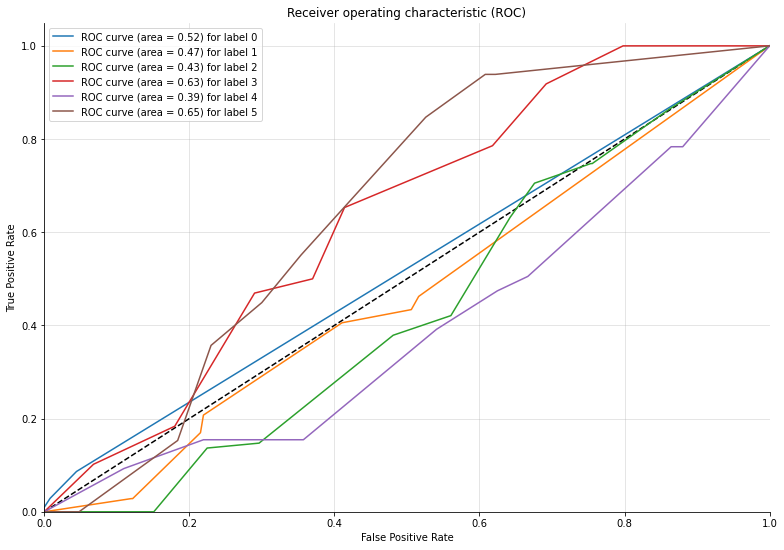

In [140]:
compute_evaluation_metric( X_test, y_test, y_pred, y_pred_prod,y_train,X_train)

In [152]:
model.score(X_test,y_test)

0.1505016722408027

### 6.3 Ensemble Learning

To improve our model we apply ensemble learning which is the process by which multiple models, such as classifiers or experts, are strategically generated and combined to solve a particular computational intelligence problem

#### 6.3.1 Bagging

In [168]:
model = BaggingClassifier(RandomForestClassifier
(),max_samples=0.5,max_features=1.0, n_estimators=20)
model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.5,
                  n_estimators=20)

In [169]:
model.score(X_test,y_test)

0.7290969899665551

#### 6.3.2 Boosting

In [170]:
model = AdaBoostClassifier(RandomForestClassifier(), n_estimators= 5, learning_rate= 1)
model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=1,
                   n_estimators=5)

In [171]:
model.score(X_test,y_test)

0.7391304347826086

#### 6.3.3 Voting Classifier

In [179]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel= 'poly', degree= 2)

In [180]:
model = VotingClassifier(estimators= [('lr',lr),('dt',dt),('svm',svm)], voting= 'hard')
model.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('svm', SVC(degree=2, kernel='poly'))])

In [181]:
model.score(X_test,y_test)

0.5568561872909699

### 6.4. Save the final model

You can save the model in local disk and use it whenever you want

In [46]:
# save the model to disk
filename = 'final_model.sav'
pickle.dump(grid.best_estimator_, open(filename, 'wb'))

In [47]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

RandomForestClassifier(max_depth=40)

In [48]:
# Read data in form of a csv file
new_test_data = pd.read_csv(input_test_file_name)

# First 5 rows of the dataset
new_test_data.head()

,player_id,player_name,player_state,summed_minutes_played,form,fdr,pts_irf,opp,player_position,player_cost,gwk_34_pts
0,1,Fernandes,100,449.0,3.0,4,3.0,LIV,MID,11.5,0
1,2,Kane,100,360.0,6.8,2,9.0,SHU,FWD,11.8,2
2,3,Salah,100,379.0,5.6,4,3.0,MUN,MID,12.6,0
3,4,Son,100,315.0,4.0,2,5.0,SHU,MID,9.5,12
4,5,Bamford,100,365.0,4.0,3,2.0,BHA,FWD,6.5,1


In [49]:
new_test_data['player_state'] = new_test_data[['player_state']].replace([100,75,50,25,0],[5,4,3,1,0])
new_test_data['fdr'] = new_test_data[['fdr']].replace([5,4,3,2,1],[1,2,3,4,5])
new_test_data['summed_minutes_played'] = np.where(new_test_data['summed_minutes_played'].between(1,90),1,new_test_data['summed_minutes_played'])
new_test_data['summed_minutes_played'] = np.where(new_test_data['summed_minutes_played'].between(91,180),2,new_test_data['summed_minutes_played'])
new_test_data['summed_minutes_played'] = np.where(new_test_data['summed_minutes_played'].between(181,270),3,new_test_data['summed_minutes_played'])
new_test_data['summed_minutes_played'] = np.where(new_test_data['summed_minutes_played'].between(271,360),4,new_test_data['summed_minutes_played'])
new_test_data['summed_minutes_played'] = np.where(new_test_data['summed_minutes_played'].between(361,450),5,new_test_data['summed_minutes_played'])
new_test_data['form'] = np.where(new_test_data['form'].between(0.1,1.9),1,new_test_data['form'])
new_test_data['form'] = np.where(new_test_data['form'].between(2.0,3.9),2,new_test_data['form'])
new_test_data['form'] = np.where(new_test_data['form'].between(4.0,5.9),3,new_test_data['form'])
new_test_data['form'] = np.where(new_test_data['form'].between(6.0,7.9),4,new_test_data['form'])
new_test_data['form'] = new_test_data['form'].mask(new_test_data['form'] > 7.9,5)
new_test_data['form'] = new_test_data['form'].mask(new_test_data['form'] < 0,0)
new_test_data['pts_irf'] = np.where(new_test_data['pts_irf'].between(0.1,1.9),1,new_test_data['pts_irf'])
new_test_data['pts_irf'] = np.where(new_test_data['pts_irf'].between(2.0,3.9),2,new_test_data['pts_irf'])
new_test_data['pts_irf'] = np.where(new_test_data['pts_irf'].between(4.0,5.9),3,new_test_data['pts_irf'])
new_test_data['pts_irf'] = np.where(new_test_data['pts_irf'].between(6.0,7.9),4,new_test_data['pts_irf'])
new_test_data['pts_irf'] = new_test_data['pts_irf'].mask(new_test_data['pts_irf'] > 7.9,5)
new_test_data['pts_irf'] = new_test_data['pts_irf'].mask(new_test_data['pts_irf'] < 0,0)
new_test_data['gwk_34_pts'] = np.where(new_test_data['gwk_34_pts'].between(1,1),1,new_test_data['gwk_34_pts'])
new_test_data['gwk_34_pts'] = np.where(new_test_data['gwk_34_pts'].between(2,3),2,new_test_data['gwk_34_pts'])
new_test_data['gwk_34_pts'] = np.where(new_test_data['gwk_34_pts'].between(4,5),3,new_test_data['gwk_34_pts'])
new_test_data['gwk_34_pts'] = np.where(new_test_data['gwk_34_pts'].between(6,8),4,new_test_data['gwk_34_pts'])
new_test_data['gwk_34_pts'] = new_test_data['gwk_34_pts'].mask(new_test_data['gwk_34_pts'] > 8,5)
new_test_data['gwk_34_pts'] = new_test_data['gwk_34_pts'].mask(new_test_data['gwk_34_pts'] < 0,0)


In [50]:
y = new_test_data['gwk_34_pts']
X = new_test_data.drop('gwk_34_pts',axis=1)

X = X.drop('player_name',axis=1)
X = X.drop('player_id',axis=1)
X = X.drop('player_position',axis=1)
X = X.drop('player_cost',axis=1)
X = X.drop('opp',axis=1)


In [51]:
result = loaded_model.score(X, y)
print(result)

# Predict class for test dataset
y_pred = loaded_model.predict(X)

features = ['Predicted Class']
df2 =  pd.DataFrame(y_pred,columns=features)
new_test_data['Predicted Class'] = df2



0.4676524953789279


In [52]:
df.head()

,player_state,summed_minutes_played,form,fdr,pts_irf,gwk_31_pts
0,5,5,3.0,2,4,2
1,5,5,5.0,2,5,2
2,5,5,2.0,3,5,4
3,5,3,2.0,2,5,4
4,5,4,2.0,1,1,3


In [53]:
dict  = new_test_data.transpose().to_dict()
list_of_dict  = dict.values()
list_of_dict  = list(list_of_dict)


def star_players_limit(list_of_dict):
    star_players = []
    for x in list_of_dict:
        
        #Change it later
        if x['player_cost'] >= 10:
            star_players.append(x)  
    return star_players


def func(list_of_players):
    budget = 104.5
    return money_team


def players_by_status(list_of_dict):
    
    fit_players= []
    for x in list_of_dict:
        
        if x['player_state'] > 3:
            fit_players.append(x)
            
           
    return fit_players

def points_top_players(list_of_dict):
    top_players = []
    for x in list_of_dict:
        
        #Change it later
        if x['Predicted Class'] > 2:
            top_players.append(x)
            
           
    return top_players


In [60]:
def get_money_team_objects(budget =  104.5, star_player_limit = 15, GKP =2, DEF = 5, MID = 5, FWD =3):
    money_team = []
    star_player_limit= star_player_limit
    budget= budget
    injured = players_by_status(list_of_dict)
    
    no_of_star_players = 0
    
    positions = {"GKP":GKP ,"DEF": DEF,"MID": MID ,"FWD": FWD}
    for player in points_top_players(list_of_dict):
        if len(money_team) < star_player_limit and player in injured and budget >= player['player_cost'] and positions[player['player_position']] > 0 :
            if (player['player_cost'] >= 8):
                no_of_star_players += 1
            
            if no_of_star_players < 4:
                money_team.append(player)
                budget-= player['player_cost'] 
                positions[player['player_position']] = positions[player['player_position'] ]- 1
            else:
                if(player['player_cost'] < 8):
                    money_team.append(player)
                    budget-= player['player_cost'] 
                    positions[player['player_position']] = positions[player['player_position'] ]- 1
      
    final_team = [(item['player_name'], item['player_position'], item['player_cost']) for item in money_team]
    total_points = sum([item['player_cost'] for item in money_team])
    return final_team

In [61]:
#outputs recommended players for game week 32
pprint.pprint(get_money_team_objects())

[('Fernandes', 'MID', 11.5),
 ('Salah', 'MID', 12.6),
 ('Martínez', 'GKP', 5.4),
 ('Vardy', 'FWD', 10.3),
 ('Meslier', 'GKP', 4.7),
 ('Mount', 'MID', 7.3),
 ('Ward-Prowse', 'MID', 5.8),
 ('Soucek', 'MID', 5.3),
 ('Shaw', 'DEF', 5.4),
 ('Wood', 'FWD', 6.3),
 ('Dunk', 'DEF', 4.9),
 ('Chilwell', 'DEF', 5.8),
 ('Richarlison', 'FWD', 7.8),
 ('Coufal', 'DEF', 4.7),
 ('Aina', 'DEF', 4.4)]


![](output.png) 